In [1]:
from IPython.display import clear_output

In [2]:
# if running in colab, execute this:
!wget https://raw.githubusercontent.com/yandexdataschool/Practical_RL/74eff0033306bdcc24b799d6b311baa408245257/week04_%5Brecap%5D_deep_learning/notmnist.py -O notmnist.py
!wget http://yaroslavvb.com/upload/notMNIST/notMNIST_small.tar.gz
# !pip3 install torch==1.0.0
# !pip3 uninstall -y Pillow
# !pip3 install Pillow==5.3.0
clear_output()

In [3]:
!wget http://yaroslavvb.com/upload/notMNIST/notMNIST_small.tar.gz
clear_output()

--2023-02-13 06:23:49--  http://yaroslavvb.com/upload/notMNIST/notMNIST_small.tar.gz
Resolving yaroslavvb.com (yaroslavvb.com)... 129.121.4.193
Connecting to yaroslavvb.com (yaroslavvb.com)|129.121.4.193|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 8458043 (8.1M) [application/x-gzip]
Saving to: ‘notMNIST_small.tar.gz.1’

notMNIST_small.tar. 100%[===================>]   8.07M  14.5MB/s    in 0.6s    

2023-02-13 06:23:50 (14.5 MB/s) - ‘notMNIST_small.tar.gz.1’ saved [8458043/8458043]



In [4]:
from __future__ import print_function
import numpy as np
import torch
print(torch.__version__)
from sklearn.datasets import load_boston
from IPython.display import clear_output

1.13.1+cu116


In [3]:
# numpy world

x = np.arange(16).reshape(4, 4)

print("X :\n%s\n" % x)
print("X.shape : %s\n" % (x.shape,))
print("add 5 :\n%s\n" % (x + 5))
print("X*X^T  :\n%s\n" % np.dot(x, x.T))
print("mean over cols :\n%s\n" % (x.mean(axis=-1)))
print("cumsum of cols :\n%s\n" % (np.cumsum(x, axis=0)))

X :
[[ 0  1  2  3]
 [ 4  5  6  7]
 [ 8  9 10 11]
 [12 13 14 15]]

X.shape : (4, 4)

add 5 :
[[ 5  6  7  8]
 [ 9 10 11 12]
 [13 14 15 16]
 [17 18 19 20]]

X*X^T  :
[[ 14  38  62  86]
 [ 38 126 214 302]
 [ 62 214 366 518]
 [ 86 302 518 734]]

mean over cols :
[ 1.5  5.5  9.5 13.5]

cumsum of cols :
[[ 0  1  2  3]
 [ 4  6  8 10]
 [12 15 18 21]
 [24 28 32 36]]



In [5]:
# pytorch world

x = np.arange(16).reshape(4, 4)

x = torch.tensor(x, dtype=torch.float32)  # or torch.arange(0,16).view(4,4)

print("X :\n%s" % x)
print("X.shape : %s\n" % (x.shape,))
print("add 5 :\n%s" % (x + 5))
print("X*X^T  :\n%s" % torch.matmul(x, x.transpose(1, 0)))  # short: x.mm(x.t())
print("mean over cols :\n%s" % torch.mean(x, dim=-1))
print("cumsum of cols :\n%s" % torch.cumsum(x, dim=0))

X :
tensor([[ 0.,  1.,  2.,  3.],
        [ 4.,  5.,  6.,  7.],
        [ 8.,  9., 10., 11.],
        [12., 13., 14., 15.]])
X.shape : torch.Size([4, 4])

add 5 :
tensor([[ 5.,  6.,  7.,  8.],
        [ 9., 10., 11., 12.],
        [13., 14., 15., 16.],
        [17., 18., 19., 20.]])
X*X^T  :
tensor([[ 14.,  38.,  62.,  86.],
        [ 38., 126., 214., 302.],
        [ 62., 214., 366., 518.],
        [ 86., 302., 518., 734.]])
mean over cols :
tensor([ 1.5000,  5.5000,  9.5000, 13.5000])
cumsum of cols :
tensor([[ 0.,  1.,  2.,  3.],
        [ 4.,  6.,  8., 10.],
        [12., 15., 18., 21.],
        [24., 28., 32., 36.]])


## NumPy and Pytorch

As you can notice, pytorch allows you to hack stuff much the same way you did with numpy. No graph declaration, no placeholders, no sessions. This means that you can _see the numeric value of any tensor at any moment of time_. Debugging such code can be done with by printing tensors or using any debug tool you want (e.g. [gdb](https://wiki.python.org/moin/DebuggingWithGdb)).

You could also notice the a few new method names and a different API. So no, there's no compatibility with numpy [yet](https://github.com/pytorch/pytorch/issues/2228) and yes, you'll have to memorize all the names again. Get excited!

![img](http://i0.kym-cdn.com/entries/icons/original/000/017/886/download.jpg)

For example, 
* If something takes a list/tuple of axes in numpy, you can expect it to take *args in pytorch
 * `x.reshape([1,2,8]) -> x.view(1,2,8)`
* You should swap _axis_ for _dim_ in operations like mean or cumsum
 * `x.sum(axis=-1) -> x.sum(dim=-1)`
* most mathematical operations are the same, but types an shaping is different
 * `x.astype('int64') -> x.type(torch.LongTensor)`

To help you acclimatize, there's a [table](https://github.com/torch/torch7/wiki/Torch-for-Numpy-users) covering most new things. There's also a neat [documentation page](http://pytorch.org/docs/master/).

Finally, if you're stuck with a technical problem, we recommend searching [pytorch forumns](https://discuss.pytorch.org/). Or just googling, which usually works just as efficiently. 

If you feel like you almost give up, remember two things: __GPU__ an __free gradients__. Besides you can always jump back to numpy with x.numpy()

### Warmup: trigonometric knotwork
_inspired by [this post](https://www.quora.com/What-are-the-most-interesting-equation-plots)_

There are some simple mathematical functions with cool plots. For one, consider this:

$$ x(t) = t - 1.5 * cos( 15 t) $$
$$ y(t) = t - 1.5 * sin( 16 t) $$


In [6]:
t = torch.linspace(-10, 10, steps=10000)
torch.sin(t)


tensor([ 0.5440,  0.5423,  0.5407,  ..., -0.5407, -0.5423, -0.5440])

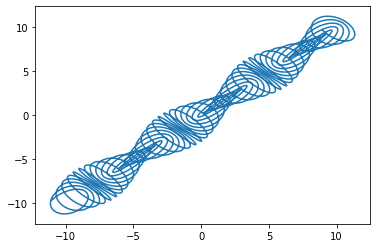

In [7]:
import matplotlib.pyplot as plt
%matplotlib inline

t = torch.linspace(-10, 10, steps=10000)

# compute x(t) and y(t) as defined above
x =  t - torch.cos(15 * t) * 1.5  
y =  t - torch.sin(16 * t) * 1.5
plt.plot(x.numpy(), y.numpy())

## Automatic gradients

Any self-respecting DL framework must do your backprop for you. Torch handles this with the `autograd` module.

The general pipeline looks like this:
* When creating a tensor, you mark it as `requires_grad`:
    * __```torch.zeros(5, requires_grad=True)```__
    * torch.tensor(np.arange(5), dtype=torch.float32, requires_grad=True)
* Define some differentiable `loss = arbitrary_function(a)`
* Call `loss.backward()`
* Gradients are now available as ```a.grads```

__Here's an example:__ let's fit a linear regression on Boston house prices

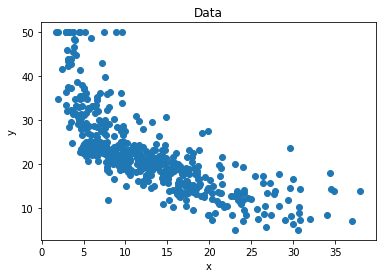

In [28]:
from sklearn.datasets import load_boston
from IPython.display import clear_output
boston = load_boston()
clear_output()
plt.scatter(boston.data[:, -1], boston.target)
plt.ylabel('y')
plt.xlabel('x')
plt.title('Data');

In [47]:
from torch.autograd import Variable
w = torch.zeros(1, requires_grad=True)
w_2 = torch.zeros(1, requires_grad=True)
w_3 = torch.zeros(1, requires_grad=True)
b = torch.zeros(1, requires_grad=True)

x = torch.tensor(boston.data[:, -1] / 10, dtype=torch.float32)
y = torch.tensor(boston.target, dtype=torch.float32)

In [33]:
y_pred = w * x + w_2 * (x ** 2) + b + w_3 * (x ** 3)
loss = torch.mean((y_pred - y)**2)

# propagete gradients
loss.backward()

The gradients are now stored in `.grad` of those variables that require them.

In [25]:
print("dL/dw = \n", w.grad)
print('dL/dw_2 = \n', w_2.grad)
print("dL/db = \n", b.grad)

dL/dw = 
 tensor([-162.8259])
dL/dw_2 = 
 tensor([-68.1230])
dL/db = 
 tensor([-90.1312])


If you compute gradient from multiple losses, the gradients will add up at variables, therefore it's useful to __zero the gradients__ between iteratons.

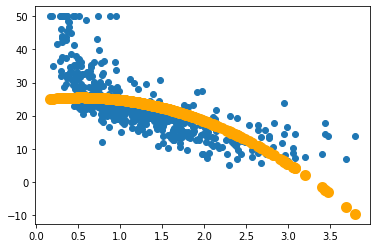

loss =  59.141834


In [48]:
from IPython.display import clear_output
learning_rate = 0.01
for i in range(500):

    y_pred = w * x + w_2 * (x ** 2) + b # w_3 * (x ** 3)
    loss = torch.mean((y_pred - y)**2)
    loss.backward()

    w.data -= learning_rate * w.grad.data
    w_2.data -= learning_rate * w_2.grad.data
    # w_3.data -= learning_rate * w_3.grad.data
    b.data -= learning_rate * b.grad.data

    # zero gradients
    w.grad.data.zero_()
    w_2.grad.data.zero_()
    # w_3.grad.data.zero_()
    b.grad.data.zero_()

    # the rest of code is just bells and whistles
    if (i+1) % 5 == 0:
        clear_output(True)
        plt.scatter(x.data.numpy(), y.data.numpy())
        plt.scatter(x.data.numpy(), y_pred.data.numpy(),
                    color='orange', linewidth=5)
        plt.show()

        print("loss = ", loss.data.numpy())
        if loss.data.numpy() < 0.5:
            print("Done!")
            break

# High-level pytorch

So far we've been dealing with low-level torch API. While it's absolutely vital for any custom losses or layers, building large neura nets in it is a bit clumsy.

Luckily, there's also a high-level torch interface with a pre-defined layers, activations and training algorithms. 

We'll cover them as we go through a simple image recognition problem: classifying letters into __"A"__ vs __"B"__.


In [5]:
!pip install https://github.com/CellProfiling/HPA-Cell-Segmentation/archive/master.zip

In [6]:
!pip install Pillow

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [22]:
import os
from glob import glob
from PIL import Image
from torchvision import transforms
import numpy as np
from imageio import imread
from skimage.transform import resize
from sklearn.model_selection import train_test_split

def load_notmnist(path='./notMNIST_small', letters='ABCDEFGHIJ',
                  img_shape=(28, 28), test_size=0.25, one_hot=False):
    # download data if it's missing. If you have any problems, go to the urls
    # and load it manually.
    if not os.path.exists(path):
        print("Downloading data...")
        assert os.system(
            'wget http://yaroslavvb.com/upload/notMNIST/notMNIST_small.tar.gz') == 0
        print("Extracting ...")
        assert os.system(
            'tar -zxvf notMNIST_small.tar.gz > untar_notmnist.log') == 0
    transform = transforms.Compose([
    transforms.Resize((28, 28)),
    transforms.ToTensor()])
    data, labels = [], []
    print("Parsing...")
    for img_path in glob(os.path.join(path, '*/*')):
        class_i = img_path.split(os.sep)[-2]
        if class_i not in letters:
            continue
        try:
            img = Image.open(img_path)
            data.append(transform(img))
            labels.append(class_i,)
        except BaseException:
            print(
                "found broken img: %s [it's ok if <10 images are broken]" %
                img_path)

    data = np.stack(data)[:, None].astype('float32')
    data = (data - np.mean(data)) / np.std(data)

    # convert classes to ints
    letter_to_i = {l: i for i, l in enumerate(letters)}
    labels = np.array(list(map(letter_to_i.get, labels)))

    if one_hot:
        labels = (np.arange(np.max(labels) + 1)
                  [None, :] == labels[:, None]).astype('float32')

    # split into train/test
    X_train, X_test, y_train, y_test = train_test_split(
        data, labels, test_size=test_size, random_state=42)

    print("Done")
    return X_train, y_train, X_test, y_test


In [23]:
X_train, y_train, X_test, y_test = load_notmnist(letters='AB')
X_train, X_test = X_train.reshape([-1, 784]), X_test.reshape([-1, 784])
clear_output()
print("Train size = %i, test_size = %i" % (len(X_train), len(X_test)))

Train size = 2808, test_size = 937


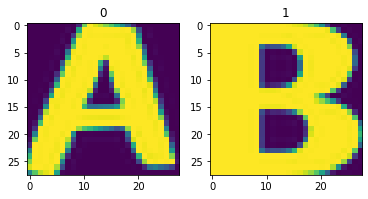

In [25]:
import matplotlib.pyplot as plt
for i in [0, 1]:
    plt.subplot(1, 2, i + 1)
    plt.imshow(X_train[i].reshape([28, 28]))
    plt.title(str(y_train[i]))

Let's start with layers. The main abstraction here is __`torch.nn.Module`__

In [26]:
from torch import nn
import torch.nn.functional as F

print(nn.Module.__doc__)

Base class for all neural network modules.

    Your models should also subclass this class.

    Modules can also contain other Modules, allowing to nest them in
    a tree structure. You can assign the submodules as regular attributes::

        import torch.nn as nn
        import torch.nn.functional as F

        class Model(nn.Module):
            def __init__(self):
                super().__init__()
                self.conv1 = nn.Conv2d(1, 20, 5)
                self.conv2 = nn.Conv2d(20, 20, 5)

            def forward(self, x):
                x = F.relu(self.conv1(x))
                return F.relu(self.conv2(x))

    Submodules assigned in this way will be registered, and will have their
    parameters converted too when you call :meth:`to`, etc.

    .. note::
        As per the example above, an ``__init__()`` call to the parent class
        must be made before assignment on the child.

    :ivar training: Boolean represents whether this module is in training or
         

There's a vast library of popular layers and architectures already built for ya'.

This is a binary classification problem, so we'll train a __Logistic Regression with sigmoid__.
$$P(y_i | X_i) = \sigma(W \cdot X_i + b) ={ 1 \over {1+e^{- [W \cdot X_i + b]}} }$$


In [65]:
# create a network that stacks layers on top of each other
model = nn.Sequential()

# add first "dense" layer with 784 input units and 1 output unit.
model.add_module('l1', nn.Linear(784, 1))

# add softmax activation for probabilities. Normalize over axis 1
# note: layer names must be unique
model.add_module('l2', nn.Sigmoid())

In [28]:
print("Weight shapes:", [w.shape for w in model.parameters()])

Weight shapes: [torch.Size([1, 784]), torch.Size([1])]


In [66]:
# create dummy data with 3 samples and 784 features
x = torch.tensor(X_train[:3], dtype=torch.float32, requires_grad = True)
y = torch.tensor(y_train[:3], dtype=torch.float32, requires_grad = True)

# compute outputs given inputs, both are variables
y_predicted = model(x)[:, 0]

y_predicted  # display what we've got

tensor([0.4690, 0.7351, 0.7349], grad_fn=<SelectBackward0>)

Let's now define a loss function for our model.

The natural choice is to use binary crossentropy (aka logloss, negative llh):
$$ L = {1 \over N} \underset{X_i,y_i} \sum - [  y_i \cdot log P(y_i | X_i) + (1-y_i) \cdot log (1-P(y_i | X_i)) ]$$



In [67]:
crossentropy =  -(y * np.log(y_predicted.detach()) + (1 - y) * np.log(1 - y_predicted.detach()))

loss =  crossentropy.mean()

assert tuple(crossentropy.size()) == (
    3,), "Crossentropy must be a vector with element per sample"
assert tuple(loss.size()) == tuple(
), "Loss must be scalar. Did you forget the mean/sum?"
assert loss.data.numpy() > 0, "Crossentropy must non-negative, zero only for perfect prediction"
assert loss.data.numpy() <= np.log(
    3), "Loss is too large even for untrained model. Please double-check it."

__Note:__ you can also find many such functions in `torch.nn.functional`, just type __`F.<tab>`__.

__Torch optimizers__

When we trained Linear Regression above, we had to manually .zero_() gradients on both our variables. Imagine that code for a 50-layer network.

Again, to keep it from getting dirty, there's `torch.optim` module with pre-implemented algorithms:

In [70]:
opt = torch.optim.RMSprop(model.parameters(), lr=0.01)

# here's how it's used:
loss.backward()      # add new gradients
opt.step()           # change weights
opt.zero_grad()      # clear gradients

In [71]:
# dispose of old variables to avoid bugs later
del x, y, y_predicted, loss

### Putting it all together

In [129]:
# create network again just in case
model = nn.Sequential()
model.add_module('first', nn.Linear(784, 1))
model.add_module('second', nn.Sigmoid())
loss_fn = lambda y, y_predicted: (-(y * np.log1p(y_predicted.detach()) + (1 - y) * np.log1p(1 - y_predicted.detach()))).mean()
opt = torch.optim.Adam(model.parameters(), lr=1e-3)

In [130]:
history = []
nn.CrossEntropyLoss()

for i in range(250):

    # sample 256 random images
    ix = np.random.randint(0, len(X_train), 256)
    x_batch = torch.tensor(X_train[ix], dtype=torch.float32, requires_grad = True)
    y_batch = torch.tensor(y_train[ix], dtype=torch.float32, requires_grad = True)

    # predict probabilities
    y_predicted =  model(x_batch)[:, 0]

    assert y_predicted.dim(
    ) == 1, "did you forget to select first column with [:, 0]"

    # compute loss, just like before
    loss =  loss_fn(y_predicted, y_batch)
    # loss = nn.CrossEntropyLoss()(y_predicted, y_batch)
    # compute gradients
    loss.backward()

    # Adam step
    opt.step()

    # clear gradients
    opt.zero_grad()

    history.append(loss.data.numpy())

    if i % 10 == 0:
        print("step #%i | mean loss = %.3f" % (i, np.mean(history[-10:])))

step #0 | mean loss = -0.297
step #10 | mean loss = -0.470
step #20 | mean loss = -0.593
step #30 | mean loss = -0.608
step #40 | mean loss = -0.622
step #50 | mean loss = -0.629
step #60 | mean loss = -0.634
step #70 | mean loss = -0.636
step #80 | mean loss = -0.639
step #90 | mean loss = -0.643
step #100 | mean loss = -0.643
step #110 | mean loss = -0.647
step #120 | mean loss = -0.650
step #130 | mean loss = -0.648
step #140 | mean loss = -0.650
step #150 | mean loss = -0.649
step #160 | mean loss = -0.655
step #170 | mean loss = -0.653
step #180 | mean loss = -0.654
step #190 | mean loss = -0.656
step #200 | mean loss = -0.661
step #210 | mean loss = -0.661
step #220 | mean loss = -0.661
step #230 | mean loss = -0.659
step #240 | mean loss = -0.660


__Debugging tips:__
* make sure your model predicts probabilities correctly. Just print them and see what's inside.
* don't forget _minus_ sign in the loss function! It's a mistake 99% ppl do at some point.
* make sure you zero-out gradients after each step. Srsly:)
* In general, pytorch's error messages are quite helpful, read 'em before you google 'em.
* if you see nan/inf, print what happens at each iteration to find our where exactly it occurs.
  * If loss goes down and then turns nan midway through, try smaller learning rate. (Our current loss formula is unstable).


### Evaluation

Let's see how our model performs on test data

In [131]:
# use your model to predict classes (0 or 1) for all test samples
predict = model(torch.tensor(X_test))
treshold = 0.5
predicted_y_test = np.array([1 if y > treshold else 0 for y in predict])

assert isinstance(predicted_y_test, np.ndarray), "please return np array, not %s" % type(
    predicted_y_test)
assert predicted_y_test.shape == y_test.shape, "please predict one class for each test sample"
assert np.in1d(predicted_y_test, y_test).all(), "please predict class indexes"

accuracy = np.mean(predicted_y_test == y_test)

print("Test accuracy: %.5f" % accuracy)
assert accuracy > 0.95, "try training longer"

Test accuracy: 0.96692


## More about pytorch:
* Using torch on GPU and multi-GPU - [link](http://pytorch.org/docs/master/notes/cuda.html)
* More tutorials on pytorch - [link](http://pytorch.org/tutorials/beginner/deep_learning_60min_blitz.html)
* Pytorch examples - a repo that implements many cool DL models in pytorch - [link](https://github.com/pytorch/examples)
* Practical pytorch - a repo that implements some... other cool DL models... yes, in pytorch - [link](https://github.com/spro/practical-pytorch)
* And some more - [link](https://www.reddit.com/r/pytorch/comments/6z0yeo/pytorch_and_pytorch_tricks_for_kaggle/)
